**US Accidents Exploratory Data Analysis**


*   Kaggle
* 4.2 million records
* Data does not has New York information






## Download Data

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od 
download_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amangaur6515
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 203MB/s]


In [ ]:
data_dir='/content/us-accidents/US_Accidents_Dec21_updated.csv'

**Data Preparation and Cleaning**



*   Load the file using pandas
*   Look at some info about data and columns
*   Fix any missing or incorrect values






In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(data_dir)

In [ ]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

##Percentage of missing values per column

In [ ]:
missing_per=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_per

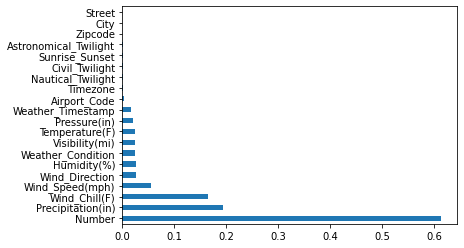

In [ ]:
missing_per=missing_per[missing_per!=0]
missing_per.plot(kind='barh')

#Exploratory data analysis

##Exploring column
* city
* start time
* start lat, start lng
* temperature
* weather codition


##Cities


In [ ]:
cities=df['City'].unique()
len(cities)

11682

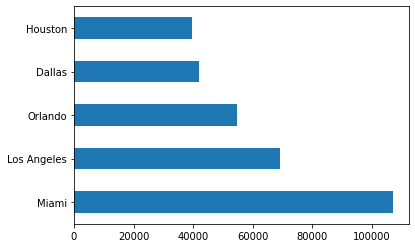

In [74]:
cities_by_accident=df['City'].value_counts()
lst=cities_by_accident[:5]
lst.plot(kind='barh')



In [ ]:
'NY' in cities_by_accident


False

In [63]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]


In [69]:
len(high_accident_cities)/len(cities_by_accident)


0.04246211796935194

In [67]:
len(low_accident_cities)

11185

####Cities with 1 accident

In [75]:
lst=cities_by_accident[cities_by_accident==1]
len(lst)


1110

##Start Time

In [77]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [79]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [81]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [84]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


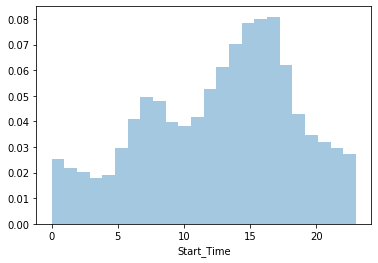

In [89]:

sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


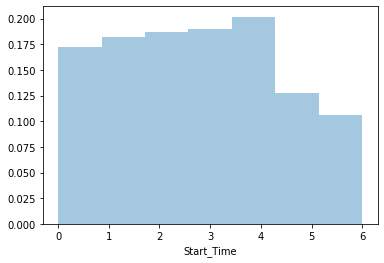

In [90]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


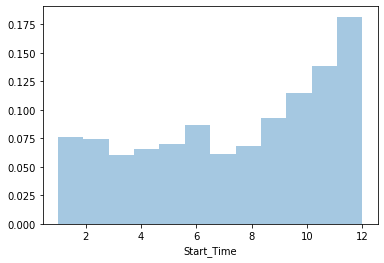

In [91]:
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)

**Questions and Answers**
* Are there more accidents in warmer or 
colder areas?
* Which 5 states have the highest number of accidents? per capita
* NewYork being the most populated city, but not in top 5 cities having more accidents?
* What time of day are accidents most frequent?
* Which Months have most accident?
* What is trend of accidents year over over?


**Summary and Conclusion**
* No data from New York
* Less 5% of cities have more than 1000 yearly accidents
* 1110 cities reported just 1 accident(need to investigate)

* A high percentage of accidents occur between  3 to 6 pm
* Weekdays have more accidents, friday more
* Nov, dec have more accidents (seems like some missing data) (2016 old years data missing)